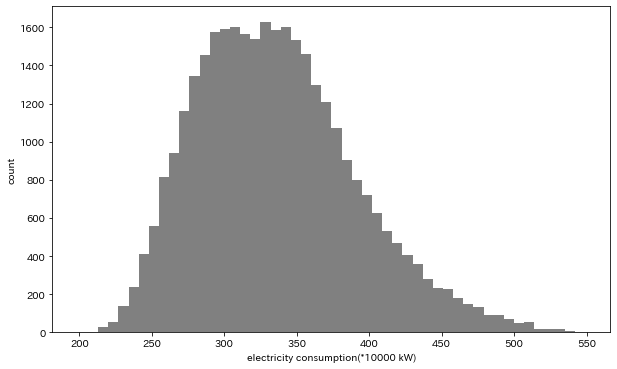

In [4]:
# coding: utf-8
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# 四国電力の電力消費量データを読み込み
ed = [pd.read_csv(
    'shikoku_electricity_%d.csv' % year,
    skiprows=3,
    names=['DATE', 'TIME', 'consumption'],
    parse_dates={'date_hour': ['DATE', 'TIME']},
    index_col='date_hour')
    for year in [2012, 2013, 2014, 2015, 2016]
]

elec_data = pd.concat(ed)


# 画像のサイズを設定する
plt.figure(figsize=(10, 6))

# ヒストグラム生成
plt.hist(elec_data['consumption'], bins=50, color="gray")
plt.xlabel('electricity consumption(*10000 kW)')
plt.ylabel(u'count')

# グラフ保存
plt.savefig('7-4-1-2-graph.png')


In [5]:
# coding: utf-8
import pandas as pd

# 気象データを読み込み
tmp = pd.read_csv(
    u'47891_高松.csv',
    parse_dates={'date_hour': ["日時"]},
    index_col = "date_hour",
    na_values="×"
)

tmp

,時,気圧(hPa)現地,気圧(hPa)海面,降水量(mm),気温(℃),湿度(％),風向・風速(m/s)風速,風向・風速(m/s)風向,日照時間(h)
date_hour,,,,,,,,,
2013-11-28 01:00:00,1,1012.1,1013.8,--,11.9,48.0,7.0,西,NaN
2013-11-28 02:00:00,2,1012.2,1013.9,--,11.5,50.0,7.4,西,NaN
2013-11-28 03:00:00,3,1012.3,1014.0,--,10.9,47.0,6.8,西,NaN
2013-11-28 04:00:00,4,1012.6,1014.3,--,10.3,44.0,6.9,西,NaN
2013-11-28 05:00:00,5,1012.7,1014.4,--,10.0,46.0,6.1,西,NaN
...,...,...,...,...,...,...,...,...,...
2012-07-06 20:00:00,20,1000.7,1002.3,1.0,27.6,78.0,4.0,西,0.0
2012-07-06 21:00:00,21,999.7,1001.3,10.0,23.9,82.0,7.8,西南西,NaN
2012-07-06 22:00:00,22,998.8,1000.4,1.5,23.6,87.0,3.0,西南西,NaN


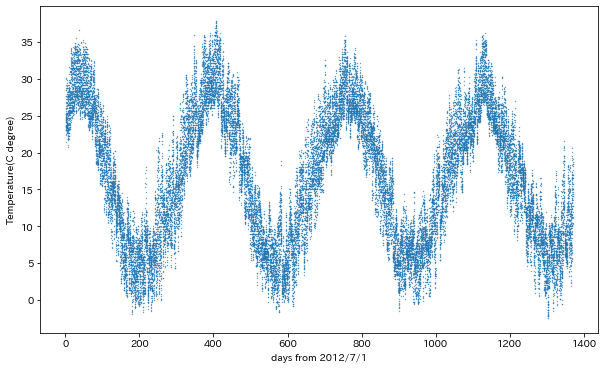

In [6]:
del tmp["時"]  # 「時」の列は使わないので、削除

# 列の名前に日本語が入っているとよくないので、これから使う列の名前のみ英語に変更
columns = {
    "降水量(mm)": "rain",
    "気温(℃)": "temperature",
    "日照時間(h)": "sunhour",
    "湿度(％)": "humid",
}
tmp.rename(columns=columns, inplace=True)

# -- 可視化 --
import matplotlib.pyplot as plt

# 画像のサイズを設定する
plt.figure(figsize=(10, 6))

# ヒストグラム生成
delta = tmp.index - pd.to_datetime('2012/07/01 00:00:00')
tmp['time'] = delta.days + delta.seconds / 3600.0 / 24.0

plt.scatter(tmp['time'], tmp['temperature'], s=0.1)
plt.xlabel('days from 2012/7/1')
plt.ylabel('Temperature(C degree)')

# グラフ保存
plt.savefig('7-4-1-3-graph.png')


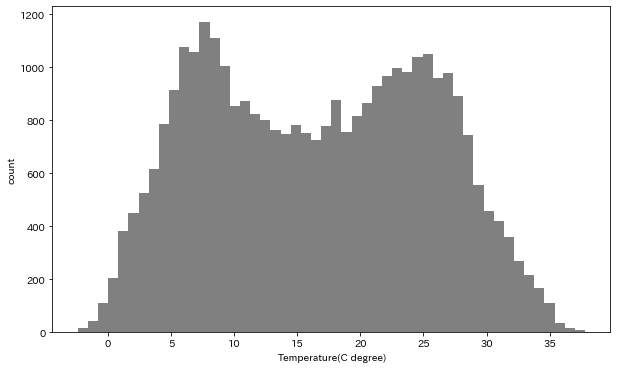

In [7]:
# coding: utf-8
import pandas as pd

# 気象データを読み込み
tmp = pd.read_csv(
    u'47891_高松.csv',
    parse_dates={'date_hour': ["日時"]},
    index_col="date_hour",
    na_values="×"
)

del tmp["時"]  # 「時」の列は使わないので、削除

# 列の名前に日本語が入っているとよくないので、これから使う列の名前のみ英語に変更
columns = {
    "降水量(mm)": "rain",
    "気温(℃)": "temperature",
    "日照時間(h)": "sunhour",
    "湿度(％)": "humid",
}
tmp.rename(columns=columns, inplace=True)

# -- 可視化 --
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

# ヒストグラム生成

plt.hist(tmp['temperature'], bins=50, color="gray")
plt.xlabel('Temperature(C degree)')
plt.ylabel('count')

# グラフ保存
plt.savefig('7-4-1-4-graph.png')


/Users/shiba-t/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:36: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.


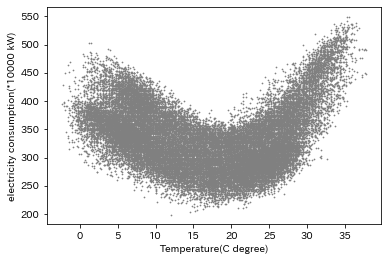

In [8]:
# coding: utf-8
import pandas as pd

# 四国電力の電力消費量データを読み込み
ed = [pd.read_csv(
    'shikoku_electricity_%d.csv' % year,
    skiprows=3,
    names=['DATE', 'TIME', 'consumption'],
    parse_dates={'date_hour': ['DATE', 'TIME']},
    index_col='date_hour')
    for year in [2012, 2013, 2014, 2015, 2016]
]

elec_data = pd.concat(ed)

# 気象データを読み込み
tmp = pd.read_csv(
    u'47891_高松.csv',
    parse_dates={'date_hour': ["日時"]},
    index_col="date_hour",
    na_values="×"
)

del tmp["時"]  # 「時」の列は使わないので、削除

# 列の名前に日本語が入っているとよくないので、これから使う列の名前のみ英語に変更
columns = {
    "降水量(mm)": "rain",
    "気温(℃)": "temperature",
    "日照時間(h)": "sunhour",
    "湿度(％)": "humid",
}
tmp.rename(columns=columns, inplace=True)

# 気象データと電力消費量データをいったん統合して時間軸を合わせたうえで、再度分割
takamatsu = elec_data.join(tmp["temperature"]).dropna().as_matrix()

takamatsu_elec = takamatsu[:, 0:1]
takamatsu_whhr = takamatsu[:, 1:]

# -- 可視化 --
import matplotlib.pyplot as plt

# 以下グラフ生成
plt.xlabel('Temperature(C degree)')
plt.ylabel('electricity consumption(*10000 kW)')

# 以下モノクロ環境の設定
plt.scatter(takamatsu_whhr, takamatsu_elec, s=0.5,
            color="gray", label='electricity consumption(measured)')

plt.savefig('7-5-1-1-graph.png')


In [9]:
takamatsu_elec

array([[256.],
       [269.],
       [289.],
       ...,
       [298.],
       [283.],
       [274.]])

In [10]:
takamatsu_whhr

array([[24.5],
       [24.1],
       [23.6],
       ...,
       [15.8],
       [15.1],
       [14.6]])